In [1]:
import import_ipynb

In [2]:
%matplotlib inline
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from models import base_model
import h5py
from utils import load_model, compile_model, STFT
from prep_data import preprocess, load_wav_list, load_wav_list_for_test
import librosa
import soundfile as sf

Using TensorFlow backend.


importing Jupyter notebook from models.ipynb
importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from prep_data.ipynb
p225  p234  p245  p254	p263  p272  p281  p293	p303  p313  p330  p345	p376
p226  p236  p246  p255	p264  p273  p282  p294	p304  p314  p333  p347
p227  p237  p247  p256	p265  p274  p283  p295	p305  p315  p334  p351
p228  p238  p248  p257	p266  p275  p284  p297	p306  p316  p335  p360
p229  p239  p249  p258	p267  p276  p285  p298	p307  p317  p336  p361
p230  p240  p250  p259	p268  p277  p286  p299	p308  p318  p339  p362
p231  p241  p251  p260	p269  p278  p287  p300	p310  p323  p340  p363
p232  p243  p252  p261	p270  p279  p288  p301	p311  p326  p341  p364
p233  p244  p253  p262	p271  p280  p292  p302	p312  p329  p343  p374


In [30]:
def test_samples():
    # Hyper params
    BATCH_SIZE = 256
    LOAD_WEIGHTS = True
    WEIGHTS_PATH = 'weights/'
    WEIGHTS_FILE = 'asr-weights.hdf5'
    
    model = base_model(summary=False)
    model = load_model(model, os.path.join(WEIGHTS_PATH,WEIGHTS_FILE) , load_weights=LOAD_WEIGHTS)
    model = compile_model(model)
    
    
    # load test wav samples
    test_samples = load_wav_list_for_test('test-samples/')
    
    #for test_sample in test_samples:
    # patch sample data
    X, Y, _ = preprocess(test_samples, start=0, end=len(test_samples)-1, sr=48000, scale=6, dimension=256, stride=256, tag='test')

    print(X.shape)
    print(Y.shape)

    # predict
    pred = model.predict(X)

    # evaluate
    scores = model.evaluate(X,Y)
    print('Evaluate scores')
    for score in scores:
        print('- %10f'%(score))

    STFT(Y.flatten(), title='Original',n_fft=2048, show=True)
    STFT(X.flatten(), title='Downsampled',n_fft=2048, show=True)
    STFT(pred.flatten(), title='Upsampled',n_fft=2048, show=True)
    #saving the downsampled and the final file
    #dunno=44100
    sf.write('downsampled.wav',X.flatten(), 8000,'PCM_24')
    sf.write('superrezzed.wav',pred.flatten(),48000,'PCM_24')

load base model..
load model weights success!
model compilation success!
load wav list examples..
test-samples/test2.wav
test-samples/test2.wav - 1/1
high resolution(Y) dataset shape is  (40882, 256, 1)
low resolution(X) dataset shape is  (40882, 256, 1)
works
(40882, 256, 1)
(40882, 256, 1)
(40882, 256, 1)
40882/40882 [==============================] - 4s 102us/step
Evaluate scores
-   0.001896
-  15.524393
-  13.547657
[-2.9027165e-06  7.8909369e-07  2.5653933e-06 ...  2.5683230e-05
  2.8724828e-05 -4.8148431e-05]


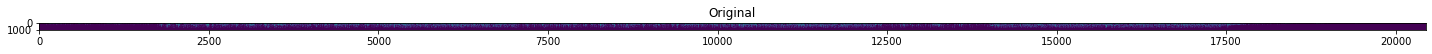

[-2.90271646e-06 -1.28960788e-06  3.54686265e-07 ... -6.79634823e-05
 -6.20194065e-05 -4.79603874e-05]


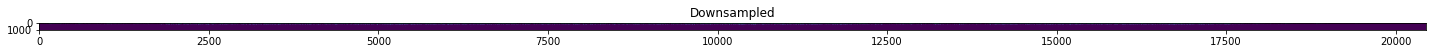

[-0.0003106  -0.00034423 -0.00060679 ...  0.00084402  0.00045874
  0.00076986]


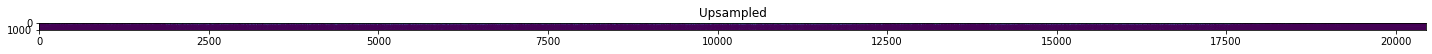

In [31]:
test_samples()

In [16]:
!ls

data		 superrezzed.wav  utils.ipynb
downsampled.wav  test.ipynb	  weights
models.ipynb	 test-samples	  ZeresenayAlemseged_2007G_900-910.wav
prep_data.ipynb  train.ipynb	  ZeresenayAlemseged_2007G_910-920.wav


In [4]:
os.chdir("INPUT PATH HERE")#input path should look like this /home/user/audio-super-res/FASR_nb/